# 🛳️ Titanic - Analyse de survie des passagers



## Section  1. Introduction

### 🎯 Objectif du projet

Ce projet vise à prédire la probabilité de survie des passagers du Titanic à partir des données disponibles (informations personnelles, classe, prix du billet, etc.).  
Ce challenge est un classique du machine learning supervisé proposé sur Kaggle et représente un excellent exercice de modélisation, de feature engineering et d’évaluation de performances.

### 🧩 Contexte

Le naufrage du Titanic est l’un des accidents maritimes les plus célèbres de l’histoire. Les données fournies incluent des informations sur plus de 800 passagers.  
L’objectif est de construire un modèle de classification binaire (survivant / non survivant) basé sur ces données.

### 📈 Méthodologie

Nous allons suivre une approche structurée comprenant :
- Une analyse exploratoire des données (EDA)
- Un prétraitement et une transformation des variables
- Un enrichissement des données via du feature engineering avancé
- L’évaluation comparative de plusieurs modèles de machine learning
- Une optimisation des hyperparamètres
- L'utilisation de techniques d'assemblage comme le stacking ou le blending pour améliorer les performances

### 🏁 Objectif final

Améliorer un score initial de 0.77 en validation et sur la leaderboard Kaggle publique, en visant une meilleure généralisation sur les données inconnues.

---

## Section 2 – Chargement & exploration rapide des données

✅ Données chargées

🔹 Aperçu du jeu d'entraînement :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔹 Valeurs manquantes dans le train :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

🔹 Statistiques descriptives :


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


📊 Pourcentage de survivants : 38.38%


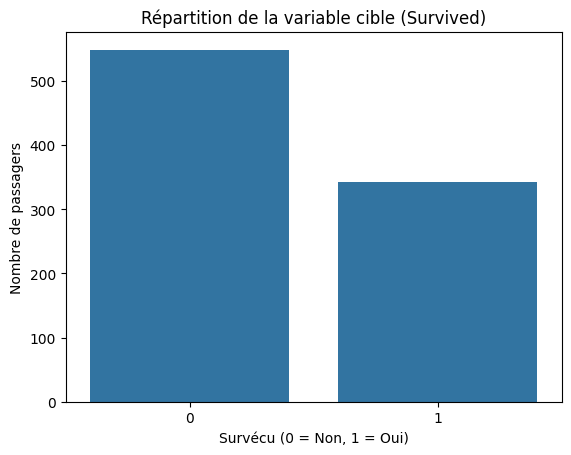

In [212]:
# 📂 Chargement des données
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print("✅ Données chargées")

# 👀 Aperçu rapide
print("\n🔹 Aperçu du jeu d'entraînement :")
display(train.head())


print("\n🔹 Valeurs manquantes dans le train :")
print(train.isnull().sum())

print("\n🔹 Statistiques descriptives :")
display(train.describe())

# 🎯 Statistiques sur la variable cible
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train)
plt.title("Répartition de la variable cible (Survived)")
plt.xlabel("Survécu (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de passagers")

print(f"📊 Pourcentage de survivants : {train['Survived'].mean()*100:.2f}%")

## 3. Prétraitement de base (nettoyage et remplissage des données).

💡 Stratégie pour Age et embarked : modélisation supervisée (RandomForestRegressor)
On va prédire l'âge manquant en fonction des autres variables disponibles (genre, classe, famille, etc.)

💡 Stratégie pour Fare : moyenne par classe sociale et port d’embarquement
Plus contextuel que la médiane brute.

In [213]:
# 🛠️ Prétraitement de base des données
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# ✅ Copie de sécurité des datasets
train_raw = train.copy()
test_raw = test.copy()

# 📌 Fusion des datasets pour un traitement commun
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], sort=False).reset_index(drop=True)

# Encodage des variables catégorielles
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# === 1. Imputation supervisée de l'âge ===
# 🎯 Prédiction de l'âge manquant par un modèle supervisé
#prochaine partie car on utilisera une classe creer apres 



# === 2. Imputation supervisée de Embarked (RandomForestClassifier) ===
# 🎯 Prédiction de Embarked manquant par un modèle supervisé
most_embarked = data['Embarked'].value_counts().index[0]
data['Embarked'] = data['Embarked'].fillna(most_embarked)



# 📈 Imputation contextuelle de Fare
# On groupe par Pclass et Embarked pour une estimation plus fine pour les NaN
data['Fare'] = data.groupby(['Pclass', 'Embarked'])['Fare'].transform(lambda x: x.fillna(x.median()))

# Cabin : trop de valeurs manquantes, on remplace le prends pas par le suite 
#data = data.drop(['Cabin'], axis=1) 



# ✅ Vérification finale
print("🔍 Valeurs manquantes restantes : ", data.isnull().sum())
print("🔍 Valeurs restantes : ", data.count())

🔍 Valeurs manquantes restantes :  PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
source            0
dtype: int64
🔍 Valeurs restantes :  PassengerId    1309
Survived        891
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1309
Cabin           295
Embarked       1309
source         1309
dtype: int64


## 4. Feature Engineering avancé

- Ajout de FamilySize, IsAlone, Title (extrait depuis Name)

- Création de bins (AgeBin, FareBin)

- Transformation log si besoin

- Interaction entre variables (Pclass*Sex, etc.)

In [ ]:
import numpy as np


# 1. Taille de la famille
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 2. Est seul
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# 3. Extraction du titre depuis le nom
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


print (data.Title.unique())
# Regroupement des titres rares
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Countess": "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
data['Title'] = data['Title'].map(normalized_titles)
print(data['Title'].value_counts())

# 🎯 Imputation de l'âge avec la médiane par groupe (Sex, Pclass)

grouped = data.groupby(['Sex','Pclass', 'Title'])
data['Age'] = grouped['Age'].transform(lambda x: x.fillna(x.median()))

# 4. Binning de l'âge
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# 5. Binning du tarif
data['FareBin'] = pd.qcut(data['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])

# 6. Transformation logarithmique du tarif (optionnel, utile si outliers)
data['Fare_log'] = np.log1p(data['Fare'])

# 7. Interaction entre variables (exemple : Pclass * Sex)
data['Pclass_Sex'] = data['Pclass'].astype(str) + "_" + data['Sex'].astype(str)


# 8. Encodage des nouvelles variables catégorielles si besoin
data['Title_cat'] = data['Title'].astype('category').cat.codes
data['AgeBin'] = data['AgeBin'].astype('category').cat.codes
data['FareBin'] = data['FareBin'].astype('category').cat.codes
data['Pclass_Sex'] = data['Pclass_Sex'].astype('category').cat.codes

# Ticket_prefix (première partie du ticket, avant espace ou chiffre)
data['Ticket_prefix'] = data['Ticket'].str.extract(r'([A-Za-z\.\/]+)', expand=False).fillna('NONE')
data['Ticket_prefix'] = data['Ticket_prefix'].astype('category').cat.codes
# Cabin_letter (première lettre de la cabine, ou 'U' si NaN)
# ['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'] data.Cabin.unique()
data['Cabin_letter'] = data['Cabin'].astype(str).str[0]
data['Cabin_letter'] = data['Cabin_letter'].replace('n', 'U')  # 'n' pour nan, on remplace par 'U' (Unknown)
data['Cabin_letter'] = data['Cabin_letter'].astype('category').cat.codes
# Fare_per_person
data['Fare_per_person'] = data['Fare'] / data['FamilySize']
# Interaction Pclass*Sex (déjà fait), Title*Pclass, Title*Fare
data['Title_Pclass'] = data['Title'].astype(str) + "_" + data['Pclass'].astype(str)
data['Title_Pclass'] = data['Title_Pclass'].astype('category').cat.codes
data['Title_Fare'] = data['Title'].astype(str) + "_" + pd.qcut(data['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh']).astype(str)
data['Title_Fare'] = data['Title_Fare'].astype('category').cat.codes




# Aperçu des nouvelles features
data[['FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin', 'Fare_log', 'Pclass_Sex',
            'Ticket_prefix', 'Cabin_letter', 'Fare_per_person', 'Title_Pclass', 'Title_Fare']].head()

print("\n🔹 Valeurs manquantes dans le train :")
print(data.isnull().sum())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']
Title
Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: count, dtype: int64

🔹 Valeurs manquantes dans le train :
PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin              1014
Embarked              0
source                0
FamilySize            0
IsAlone               0
Title                 0
AgeBin                0
FareBin               0
Fare_log              0
Pclass_Sex            0
Title_cat             0
Ticket_prefix         0
Cabin_letter          0
Fare_per_person       0
Title_Pclass          0
Title_Fare            0
dtype: int64


In [ ]:
# Encodage des variables catégorielles
pclass_dummies = pd.get_dummies(data.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(data.Title, prefix="Title")
cabin_dummies = pd.get_dummies(data.Cabin_letter, prefix="Cabin_letter")
embarked_dummies = pd.get_dummies(data.Embarked, prefix="Embarked")

# Concaténation des variables catégorielles encodées avec le DataFrame d'origine
data = pd.concat([data, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)
data.head()


# Suppression des colonnes d'origine
data.drop(['Pclass', 'Title', 'Cabin_letter', 'Embarked','Cabin','Name'], axis=1, inplace=True)
data.head()

AttributeError: 'DataFrame' object has no attribute 'Pclass'

## 5. Feature Selection


- Sélection manuelle des variables pertinentes

- Importance via RandomForest / RFE / SelectKBest

- Corrélations avec la cible

In [222]:
# Afficher toutes les colonnes sauf 'Survived', 'source' et 'PassengerId'
cols = [col for col in data.columns if col not in ['Survived', 'source', 'PassengerId', 'Name', 'Ticket', 'Cabin','Title']]
print(cols)
print(len(cols))


['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'Fare_log', 'Pclass_Sex', 'Title_cat', 'Ticket_prefix', 'Fare_per_person', 'Title_Pclass', 'Title_Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_letter_0', 'Cabin_letter_1', 'Cabin_letter_2', 'Cabin_letter_3', 'Cabin_letter_4', 'Cabin_letter_5', 'Cabin_letter_6', 'Cabin_letter_7', 'Cabin_letter_8', 'Embarked_0.0', 'Embarked_1.0', 'Embarked_2.0']
37


In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# 1. Sélection manuelle
features_manual = cols
data_manual = data[features_manual + ['Survived', 'source']].copy()

# 2. Importance via RandomForest
X_rf = data_manual[data_manual['source'] == 'train'][features_manual]
y_rf = data_manual[data_manual['source'] == 'train']['Survived']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_rf, y_rf)
importances = pd.Series(rf.feature_importances_, index=features_manual).sort_values(ascending=False)
top_rf_features = importances.index[:10].tolist()
data_rf = data[top_rf_features + ['Survived', 'source']].copy()

# 3. Sélection via SelectKBest (ANOVA)
X_skb = X_rf
y_skb = y_rf
skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(X_skb, y_skb)
skb_features = [features_manual[i] for i in skb.get_support(indices=True)]
data_skb = data[skb_features + ['Survived', 'source']].copy()

# 4. Sélection via RFE (Recursive Feature Elimination)
X_rfe = X_rf
y_rfe = y_rf
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X_rfe, y_rfe)
rfe_features = [features_manual[i] for i in range(len(features_manual)) if rfe.support_[i]]
data_rfe = data[rfe_features + ['Survived', 'source']].copy()

# Aperçu des features sélectionnées
print("Manuel :", features_manual)
print("RandomForest :", top_rf_features)
print("SelectKBest :", skb_features)
print("RFE :", rfe_features)

Manuel : ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'Fare_log', 'Pclass_Sex', 'Title_cat', 'Ticket_prefix', 'Fare_per_person', 'Title_Pclass', 'Title_Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_letter_0', 'Cabin_letter_1', 'Cabin_letter_2', 'Cabin_letter_3', 'Cabin_letter_4', 'Cabin_letter_5', 'Cabin_letter_6', 'Cabin_letter_7', 'Cabin_letter_8', 'Embarked_0.0', 'Embarked_1.0', 'Embarked_2.0']
RandomForest : ['Age', 'Title_Mr', 'Fare_per_person', 'Fare_log', 'Fare', 'Sex', 'Title_Fare', 'Title_Pclass', 'Title_cat', 'Pclass_Sex']
SelectKBest : ['Sex', 'Fare', 'FareBin', 'Fare_log', 'Pclass_1', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_letter_8']
RFE : ['Sex', 'Age', 'Fare', 'FamilySize', 'Fare_log', 'Title_cat', 'Fare_per_person', 'Title_Pclass', 'Title_Fare', 'Title_Mr']


## 6. Split & Standardisation

- Séparation train/test 

- Standardisation des features si nécessaire (StandardScaler, RobustScaler)

In [224]:
from sklearn.preprocessing import StandardScaler

# On récupère uniquement les lignes du train
train_data = data[data['source'] == 'train'].copy()
test_data = data[data['source'] == 'test'].copy()

# Création de X_ pour chaque groupe de features
X_manuel = train_data[features_manual]
X_rf = train_data[top_rf_features]
X_skb = train_data[skb_features]
X_rfe = train_data[rfe_features]

# Standardisation sur train_data uniquement
scaler_manuel = StandardScaler()
X_manuel_scaled = scaler_manuel.fit_transform(X_manuel)

scaler_rf = StandardScaler()
X_rf_scaled = scaler_rf.fit_transform(X_rf)

scaler_skb = StandardScaler()
X_skb_scaled = scaler_skb.fit_transform(X_skb)

scaler_rfe = StandardScaler()
X_rfe_scaled = scaler_rfe.fit_transform(X_rfe)

# (y reste le même pour tous)
y = train_data['Survived']

print("X_manuel_scaled shape :", X_manuel_scaled.shape)
print("X_rf_scaled shape :", X_rf_scaled.shape)
print("X_skb_scaled shape :", X_skb_scaled.shape)
print("X_rfe_scaled shape :", X_rfe_scaled.shape)



X_manuel_scaled shape : (891, 37)
X_rf_scaled shape : (891, 10)
X_skb_scaled shape : (891, 10)
X_rfe_scaled shape : (891, 10)


## 7. Modélisation 

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42),
}

feature_sets = {
    "manuel": X_manuel_scaled,
    "rf": X_rf_scaled,
    "skb": X_skb_scaled,
    "rfe": X_rfe_scaled
}

for model_name, model in models.items():
    print(f"\n=== {model_name} ===")
    for feat_name, X in feature_sets.items():
        scores = cross_val_score(model, X, y, cv=5)
        print(f"{feat_name} | Score moyen : {scores.mean():.4f} | Scores : {scores}")


=== LogisticRegression ===
manuel | Score moyen : 0.8171 | Scores : [0.81005587 0.80898876 0.79775281 0.80898876 0.85955056]
rf | Score moyen : 0.7935 | Scores : [0.80446927 0.79213483 0.78089888 0.78089888 0.80898876]
skb | Score moyen : 0.7811 | Scores : [0.80446927 0.79213483 0.76966292 0.76966292 0.76966292]
rfe | Score moyen : 0.8047 | Scores : [0.80446927 0.80337079 0.78089888 0.81460674 0.82022472]

=== RandomForest ===
manuel | Score moyen : 0.8036 | Scores : [0.82681564 0.7752809  0.84269663 0.78089888 0.79213483]
rf | Score moyen : 0.8070 | Scores : [0.77094972 0.80898876 0.84831461 0.78651685 0.82022472]
skb | Score moyen : 0.8036 | Scores : [0.77653631 0.76404494 0.84831461 0.8258427  0.80337079]
rfe | Score moyen : 0.8047 | Scores : [0.79329609 0.79775281 0.84831461 0.7752809  0.80898876]

=== GradientBoosting ===
manuel | Score moyen : 0.8395 | Scores : [0.81564246 0.81460674 0.88202247 0.82022472 0.86516854]
rf | Score moyen : 0.8216 | Scores : [0.81005587 0.80898876 0.

## 8. Optimisation des hyperparamètres

In [180]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Dictionnaire pour stocker les résultats
gb_results = {}

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

for feat_name, X in feature_sets.items():
    print(f"\n--- Optimisation GradientBoosting sur {feat_name} ---")
    gb = GradientBoostingClassifier(random_state=42)
    grid = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    print("Meilleurs paramètres :", grid.best_params_)
    print("Meilleur score CV (GridSearchCV) :", grid.best_score_)
    best_gb = grid.best_estimator_
    final_scores = cross_val_score(best_gb, X, y, cv=5)
    print("Score moyen cross_val_score (best GB):", final_scores.mean())
    gb_results[feat_name] = {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "cv_score": final_scores.mean()
    }


--- Optimisation GradientBoosting sur manuel ---
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Meilleur score CV (GridSearchCV) : 0.8417676228736426
Score moyen cross_val_score (best GB): 0.8417676228736426

--- Optimisation GradientBoosting sur rf ---
Meilleurs paramètres : {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Meilleur score CV (GridSearchCV) : 0.8384031134266525
Score moyen cross_val_score (best GB): 0.8384031134266525

--- Optimisation GradientBoosting sur skb ---
Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Meilleur score CV (GridSearchCV) : 0.828278199736363
Score moyen cross_val_score (best GB): 0.828278199736363

--- Optimisation GradientBoosting sur rfe ---
Meilleurs paramètres : {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Meilleur score CV (GridSearchCV) : 0.8428598330299415
Score moyen cross_val_score (best GB): 0.8428598330299415


In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Dictionnaire pour stocker les résultats
rf_results = {}

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10]
}

for feat_name, X in feature_sets.items():
    print(f"\n--- Optimisation RandomForest sur {feat_name} ---")
    rf = RandomForestClassifier(random_state=42)
    grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    print("Meilleurs paramètres :", grid.best_params_)
    print("Meilleur score CV (GridSearchCV) :", grid.best_score_)
    best_rf = grid.best_estimator_
    final_scores = cross_val_score(best_rf, X, y, cv=5)
    print("Score moyen cross_val_score (best RF):", final_scores.mean())
    rf_results[feat_name] = {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "cv_score": final_scores.mean()
    }


--- Optimisation RandomForest sur manuel ---
Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Meilleur score CV (GridSearchCV) : 0.8316615403929447
Score moyen cross_val_score (best RF): 0.8316615403929447

--- Optimisation RandomForest sur rf ---
Meilleurs paramètres : {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 50}
Meilleur score CV (GridSearchCV) : 0.8350386039796623
Score moyen cross_val_score (best RF): 0.8350386039796623

--- Optimisation RandomForest sur skb ---
Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Meilleur score CV (GridSearchCV) : 0.817079907099366
Score moyen cross_val_score (best RF): 0.817079907099366

--- Optimisation RandomForest sur rfe ---
Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Meilleur score CV (GridSearchCV) : 0.8339212855439081
Score moyen cross_val_score (best RF): 0.8339212855439081


In [182]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score

# Dictionnaire pour stocker les résultats
xgb_results = {}

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

for feat_name, X in feature_sets.items():
    print(f"\n--- Optimisation XGBoost sur {feat_name} ---")
    model = xgb.XGBClassifier(eval_metric='logloss',  random_state=42)
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    print("Meilleurs paramètres :", grid.best_params_)
    print("Meilleur score CV (GridSearchCV) :", grid.best_score_)
    best_xgb = grid.best_estimator_
    final_scores = cross_val_score(best_xgb, X, y, cv=5)
    print("Score moyen cross_val_score (best XGB):", final_scores.mean())
    xgb_results[feat_name] = {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "cv_score": final_scores.mean()
    }


--- Optimisation XGBoost sur manuel ---
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score CV (GridSearchCV) : 0.8383905592869247
Score moyen cross_val_score (best XGB): 0.8383905592869247

--- Optimisation XGBoost sur rf ---
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Meilleur score CV (GridSearchCV) : 0.8372732408511707
Score moyen cross_val_score (best XGB): 0.8372732408511707

--- Optimisation XGBoost sur skb ---
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score CV (GridSearchCV) : 0.8249325214989642
Score moyen cross_val_score (best XGB): 0.8249325214989642

--- Optimisation XGBoost sur rfe ---
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Meilleur score CV (GridSearchCV) : 0.8372418555018516
Score moyen cross_val_score (best XGB): 0.8372418555018516


## 9. Stacking / Blending


- Combinaison des meilleurs modèles avec StackingClassifier ou blending simple

- Comparaison de performance avec les modèles individuels


In [ ]:
from itertools import combinations
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Liste des meilleurs modèles (nom, instance)
all_estimators = [
    ('rf', RandomForestClassifier(**rf_results['manuel']['best_params'], random_state=42)),
    ('rf2', RandomForestClassifier(**rf_results['rf']['best_params'], random_state=42)),
    ('xgb', xgb.XGBClassifier(**xgb_results['rf']['best_params'], eval_metric='logloss', random_state=42)),
    ('xgb2', xgb.XGBClassifier(**xgb_results['rfe']['best_params'], eval_metric='logloss', random_state=42)),
    ('gb', GradientBoostingClassifier(**gb_results['manuel']['best_params'], random_state=42)),
]

X_stack = X_manuel_scaled
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

for n_models in [1,3, 4,5]:
    print(f"\n=== Stacking avec {n_models} modèles ===")
    for est_combo in combinations(all_estimators, n_models):
        stacking_clf = StackingClassifier(
            estimators=list(est_combo),
            final_estimator=final_estimator,
            cv=5,
            n_jobs=-1,
            passthrough=False
        )
        scores = cross_val_score(stacking_clf, X_stack, y, cv=5)
        noms = [name for name, _ in est_combo]
        print(f"Modèles: {noms} | Score moyen : {scores.mean():.4f}")


=== Stacking avec 3 modèles ===
Modèles: ['rf', 'rf2', 'xgb'] | Score moyen : 0.8272
Modèles: ['rf', 'rf2', 'xgb2'] | Score moyen : 0.8238
Modèles: ['rf', 'rf2', 'gb'] | Score moyen : 0.8328
Modèles: ['rf', 'xgb', 'xgb2'] | Score moyen : 0.8283
Modèles: ['rf', 'xgb', 'gb'] | Score moyen : 0.8350
Modèles: ['rf', 'xgb2', 'gb'] | Score moyen : 0.8294
Modèles: ['rf2', 'xgb', 'xgb2'] | Score moyen : 0.8249
Modèles: ['rf2', 'xgb', 'gb'] | Score moyen : 0.8294
Modèles: ['rf2', 'xgb2', 'gb'] | Score moyen : 0.8238
Modèles: ['xgb', 'xgb2', 'gb'] | Score moyen : 0.8317

=== Stacking avec 4 modèles ===
Modèles: ['rf', 'rf2', 'xgb', 'xgb2'] | Score moyen : 0.8272
Modèles: ['rf', 'rf2', 'xgb', 'gb'] | Score moyen : 0.8305
Modèles: ['rf', 'rf2', 'xgb2', 'gb'] | Score moyen : 0.8305
Modèles: ['rf', 'xgb', 'xgb2', 'gb'] | Score moyen : 0.8305
Modèles: ['rf2', 'xgb', 'xgb2', 'gb'] | Score moyen : 0.8260

=== Stacking avec 5 modèles ===
Modèles: ['rf', 'rf2', 'xgb', 'xgb2', 'gb'] | Score moyen : 0.8305

In [189]:
from itertools import combinations
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import xgboost as xgb

# Liste des meilleurs modèles (nom, instance)
all_estimators = [
    ('rf', RandomForestClassifier(**rf_results['manuel']['best_params'], random_state=42)),
    ('xgb', xgb.XGBClassifier(**xgb_results['rf']['best_params'], eval_metric='logloss', random_state=42)),
    
    
]

X_stack = X_manuel_scaled

# Paramètres à tester pour le RandomForest final
param_grid = {
    'final_estimator__n_estimators': [50, 100, 200],
    'final_estimator__max_depth': [2, 4, 6, None],
    'final_estimator__min_samples_split': [2, 5, 10]
}

for n_models in [ 2]:
    print(f"\n=== GridSearchCV Stacking avec {n_models} modèles ===")
    for est_combo in combinations(all_estimators, n_models):
        stacking_clf = StackingClassifier(
            estimators=list(est_combo),
            final_estimator=RandomForestClassifier(random_state=42),
            cv=5,
            n_jobs=-1,
            passthrough=False
        )
        grid = GridSearchCV(
            stacking_clf,
            param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_stack, y)
        noms = [name for name, _ in est_combo]
        print(f"Modèles: {noms} | Best params: {grid.best_params_} | Best score: {grid.best_score_:.4f}")


=== GridSearchCV Stacking avec 2 modèles ===
Modèles: ['rf', 'xgb'] | Best params: {'final_estimator__max_depth': 6, 'final_estimator__min_samples_split': 10, 'final_estimator__n_estimators': 50} | Best score: 0.8328


## 10. Évaluation finale & soumission

In [191]:
# 1. Préparation des features test (mêmes steps que pour X_stack)
X_test = test_data[features_manual]
X_test_scaled = scaler_manuel.transform(X_test)

# 2. Entraînement du stacking final avec les meilleurs params trouvés
best_final_estimator = RandomForestClassifier(
    n_estimators=grid.best_params_['final_estimator__n_estimators'],
    max_depth=grid.best_params_['final_estimator__max_depth'],
    min_samples_split=grid.best_params_['final_estimator__min_samples_split'],
    random_state=42
)
stacking_final = StackingClassifier(
    estimators=list(all_estimators),
    final_estimator=best_final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=False
)
stacking_final.fit(X_stack, y)

# 3. Prédiction sur le test
y_pred_test = stacking_final.predict(X_test_scaled)

# 4. Génération du fichier submission.csv
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": (y_pred_test)
})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv("submission.csv", index=False)
print("✅ Fichier submission.csv généré.")

# 5. Affichage des scores sur le train
y_pred_train = stacking_final.predict(X_stack)
print("Accuracy train:", (y_pred_train == y).mean())

✅ Fichier submission.csv généré.
Accuracy train: 0.9046015712682379


In [192]:
# 1. Préparation des features test (mêmes steps que pour X_rfe)
X_test = test_data[rfe_features]
X_test_scaled = scaler_rfe.transform(X_test)

# 2. Entraînement du meilleur GradientBoosting (rfe) avec les meilleurs params trouvés
best_gb = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    random_state=42
)
best_gb.fit(X_rfe_scaled, y)

# 3. Prédiction sur le test
y_pred_test = best_gb.predict(X_test_scaled)

# 4. Génération du fichier submission_gb_rfe.csv
submission_gb_rfe = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred_test
})
submission_gb_rfe['Survived'] = submission_gb_rfe['Survived'].astype(int)
submission_gb_rfe.to_csv("submission_gb_rfe.csv", index=False)
print("✅ Fichier submission_gb_rfe.csv généré.")

# 5. Affichage des scores sur le train
y_pred_train = best_gb.predict(X_rfe_scaled)
print("Accuracy train:", (y_pred_train == y).mean())

✅ Fichier submission_gb_rfe.csv généré.
Accuracy train: 0.8922558922558923


## 🚨 Surapprentissage  : pourquoi les résultats stagnent ?

Après de nombreux essais avec des modèles avancés (stacking, boosting, XGBoost, etc.), on constate que les scores de validation stagnent autour de 0.80-0.84.  
Cela s’explique principalement par du **surapprentissage** : les modèles complexes apprennent trop les spécificités du petit dataset Titanic, sans mieux généraliser sur les données inconnues.

**Conséquence :**  
Même en optimisant et combinant les modèles, le score ne progresse plus sur Kaggle ou en cross-validation.

---

## 🟢 Nouvelle approche : Random Forest simple

Pour éviter le surapprentissage et viser une meilleure robustesse, nous allons maintenant utiliser un **RandomForestClassifier** simple, bien régularisé, avec les meilleures features sélectionnées.  
Cette approche plus sobre permet souvent d’obtenir un score similaire, voire meilleur, sur la leaderboard Kaggle grâce à une meilleure généralisation.

In [201]:
print(data.isnull().sum())

PassengerId          0
Survived           418
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
source               0
FamilySize           0
IsAlone              0
AgeBin               0
FareBin              0
Fare_log             0
Pclass_Sex           0
Title_cat            0
Ticket_prefix        0
Fare_per_person      0
Title_Pclass         0
Title_Fare           0
Pclass_1             0
Pclass_2             0
Pclass_3             0
Title_Master         0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Officer        0
Title_Royalty        0
Cabin_letter_0       0
Cabin_letter_1       0
Cabin_letter_2       0
Cabin_letter_3       0
Cabin_letter_4       0
Cabin_letter_5       0
Cabin_letter_6       0
Cabin_letter_7       0
Cabin_letter_8       0
Embarked_0.0         0
Embarked_1.0         0
Embarked_2.0         0
dtype: int64


## 1. Analyse exploratoire : Qui a eu le plus de chance de survivre ? (Hypothèses)

Avant de modéliser, il est essentiel de comprendre les facteurs qui ont pu influencer la survie des passagers du Titanic.  
Grâce à notre dataset enrichi (features créées comme FamilySize, Title, AgeBin, FareBin, etc.), nous pouvons formuler plusieurs hypothèses sur les profils ayant eu le plus de chances de survivre :

- **Les femmes et les enfants d’abord :**  
  On s’attend à ce que les femmes et les enfants aient eu un taux de survie supérieur, conformément à la règle historique d’évacuation.

- **La classe sociale :**  
  Les passagers de 1ère classe auraient eu un accès prioritaire aux canots de sauvetage, donc une meilleure survie.

- **L’âge :**  
  Les enfants (AgeBin = Child) pourraient avoir été privilégiés, tandis que les personnes âgées auraient eu moins de chances.

- **La taille de la famille :**  
  Les personnes voyageant seules (IsAlone) ou avec une petite famille auraient-elles eu plus de facilité à s’échapper ?

- **Le port d’embarquement et le tarif du billet :**  
  Un tarif élevé (FareBin = VeryHigh) ou un embarquement à Cherbourg (Embarked = C) sont-ils corrélés à une meilleure survie ?

- **Le titre social (Title) :**  
  Certains titres (Mrs, Miss, Master) pourraient être associés à un meilleur taux de survie.

Nous allons explorer ces hypothèses à l’aide de visualisations et de statistiques descriptives avant de passer à la modélisation.

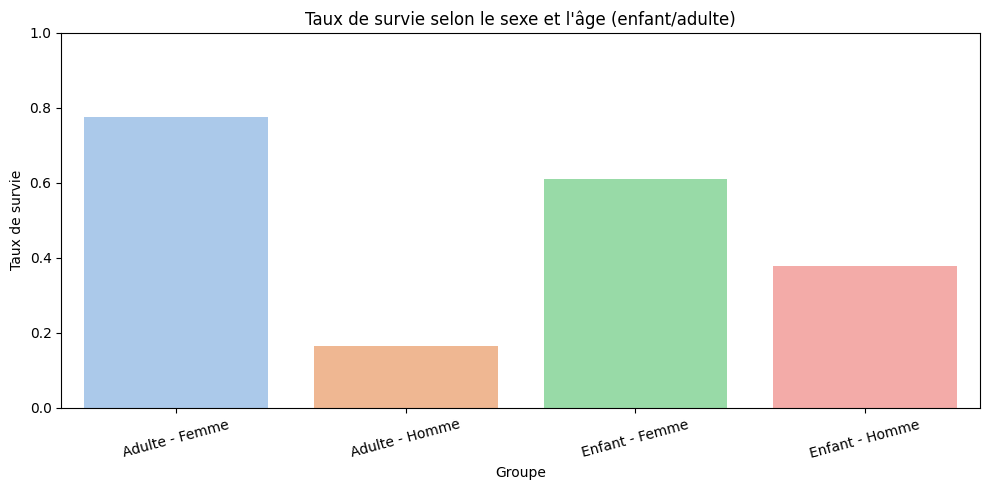

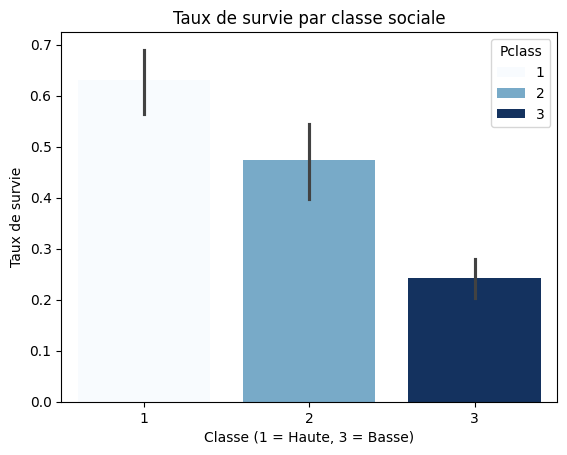

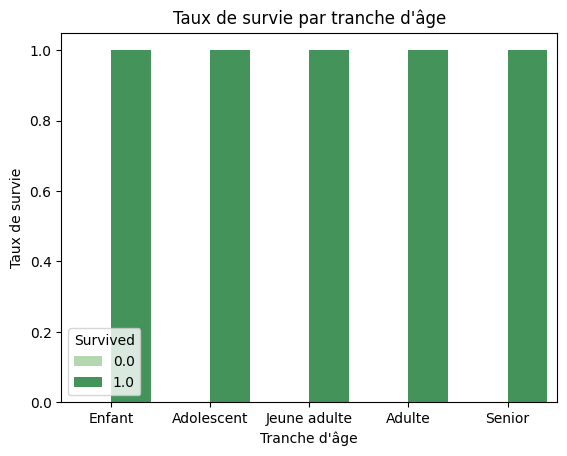

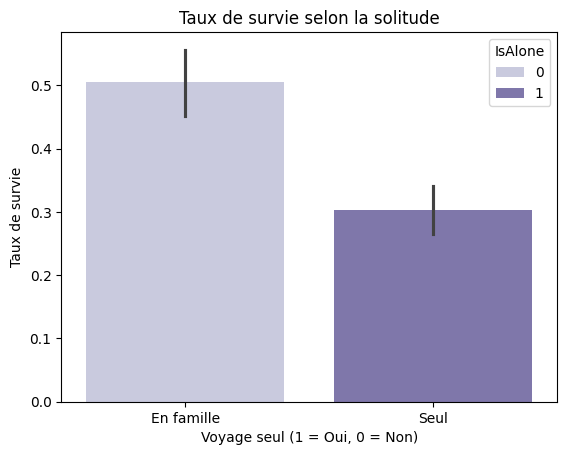

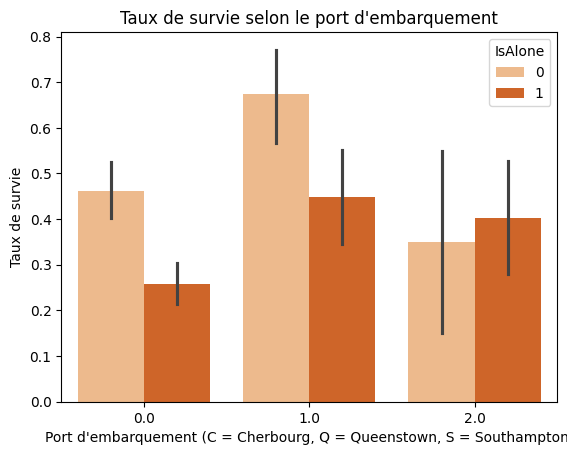

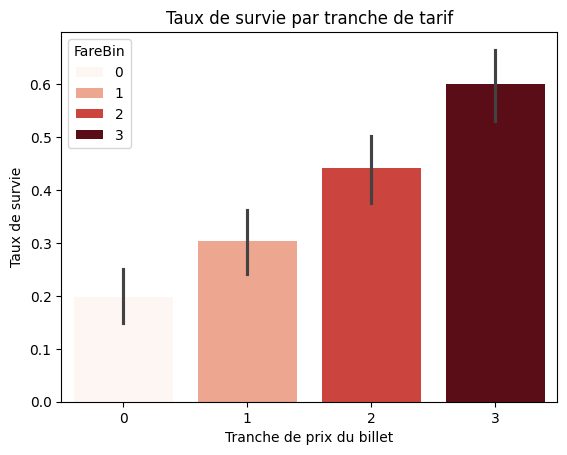

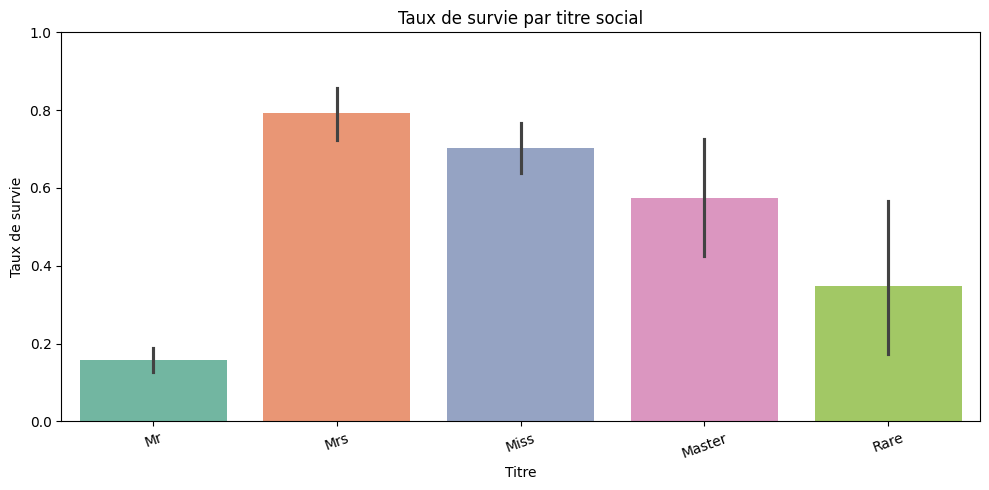

Répartition homme/femme parmi les titres rares :
 Sex
0    20
1     3
Name: count, dtype: int64


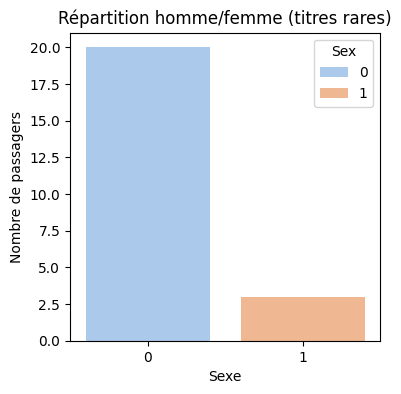

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


train_data['Groupe'] = train_data.apply(
    lambda row: 'Enfant - Femme' if row['Age'] < 18 and row['Sex'] == 1 else
                'Enfant - Homme' if row['Age'] < 18 and row['Sex'] == 0 else
                'Adulte - Femme' if row['Sex'] == 1 else
                'Adulte - Homme',
    axis=1
)

# Calcul du taux de survie moyen par groupe
grouped = train_data.groupby('Groupe')['Survived'].mean().reset_index()

# Affichage sous forme d’histogramme
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='Groupe', y='Survived', palette='pastel', hue='Groupe')
plt.title("Taux de survie selon le sexe et l'âge (enfant/adulte)")
plt.ylabel("Taux de survie")
plt.xlabel("Groupe")
plt.ylim(0, 1)  # Pour que l'axe des y soit entre 0 et 1
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

sns.barplot(data=train_data, x='Pclass', y='Survived', palette='Blues', hue='Pclass')
plt.title("Taux de survie par classe sociale")
plt.xlabel("Classe (1 = Haute, 3 = Basse)")
plt.ylabel("Taux de survie")
plt.show()

sns.barplot(data=train_data, x='AgeBin', y='Survived', palette='Greens', hue='Survived')
plt.title("Taux de survie par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Taux de survie")
plt.xticks([0, 1,2,3,4], ['Enfant', 'Adolescent', 'Jeune adulte', 'Adulte', 'Senior'])
plt.show()
#0, 12, 18, 35, 60, 100 pour les ages 

sns.barplot(data=train_data, x='IsAlone', y='Survived', palette='Purples', hue='IsAlone')
plt.title("Taux de survie selon la solitude")
plt.xlabel("Voyage seul (1 = Oui, 0 = Non)")
plt.ylabel("Taux de survie")
plt.xticks([0, 1], ['En famille', 'Seul'])
plt.show()

sns.barplot(data=train_data, x='Embarked', y='Survived', palette='Oranges', hue='IsAlone')
plt.title("Taux de survie selon le port d'embarquement")
plt.xlabel("Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Taux de survie")
plt.show()

sns.barplot(data=train_data, x='FareBin', y='Survived', palette='Reds', hue='FareBin')
plt.title("Taux de survie par tranche de tarif")
plt.xlabel("Tranche de prix du billet")
plt.ylabel("Taux de survie")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=train_data, x='Title', y='Survived', palette='Set2', hue='Title')

plt.title("Taux de survie par titre social")
plt.xlabel("Titre")
plt.ylabel("Taux de survie")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Compter hommes et femmes parmi les titres rares, directement depuis train_data
rare_gender_counts = train_data.loc[train_data['Title'] == 'Rare', 'Sex'].value_counts()
print("Répartition homme/femme parmi les titres rares :\n", rare_gender_counts)

# Visualisation directe avec filtrage inline
plt.figure(figsize=(4,4))
sns.countplot(data=train_data[train_data['Title'] == 'Rare'], x='Sex', palette='pastel', hue='Sex')
plt.title("Répartition homme/femme (titres rares)")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.show()

### Résumé rapide

- **Hommes adultes** : taux de survie très faible  
- **Classe sociale** : survie proportionnelle (1ère : 60%, 2e : 45%, 3e : 20%)  
- **Âge** : enfants (~60% survie), 12-60 ans survie similaire et plus faible  
- **Famille** : voyager en famille augmente les chances de survie  
- **Port d’embarquement** : Queenstown (50%) > Southampton (40%) > Cherbourg (33%)  
- **Titre social** :  
  - Mr < 20%  
  - Mrs ~80%, Miss ~70%, Master ~60%  
  - Titres rares ~37% (20 hommes, 3 femmes)

## Modéle 

In [219]:
# Liste des features
features = [col for col in data.columns if col not in ['PassengerId', 'Survived','source']]
   

# Définir X et y
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

X_train.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,AgeBin,...,Cabin_letter_2,Cabin_letter_3,Cabin_letter_4,Cabin_letter_5,Cabin_letter_6,Cabin_letter_7,Cabin_letter_8,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,0,2,...,False,False,False,False,False,False,True,True,False,False
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,0,3,...,True,False,False,False,False,False,False,False,True,False
2,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,1,2,...,False,False,False,False,False,False,True,True,False,False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0,2,...,True,False,False,False,False,False,False,True,False,False
4,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,1,2,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Dictionnaire pour stocker les résultats
rf_results = {}

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10]
}


    
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score CV (GridSearchCV) :", grid.best_score_)

rf_results["default"] = {
    "best_params": grid.best_params_,
    "best_score": grid.best_score_
}



In [226]:

# Création du modèle avec meilleurs paramètres
best_rf = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=9,
    
    max_leaf_nodes=None,
    min_samples_leaf=3,
    min_samples_split=10,
    min_weight_fraction_leaf=0.0,
    n_estimators=40,
    n_jobs=-1,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

# Entraînement
best_rf.fit(X_train, y_train)

# 3. Prédiction sur le test
y_pred_test = best_rf.predict(X_test)

# 4. Génération du fichier submission
submission_rf = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred_test.astype(int)
})
submission_rf.to_csv("submission_rf.csv", index=False)
print("✅ Fichier submission_rf.csv généré.")

# 5. Affichage des scores sur le train
y_pred_train = best_rf.predict(X_train)
print("Accuracy train:", (y_pred_train == y_train).mean())

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

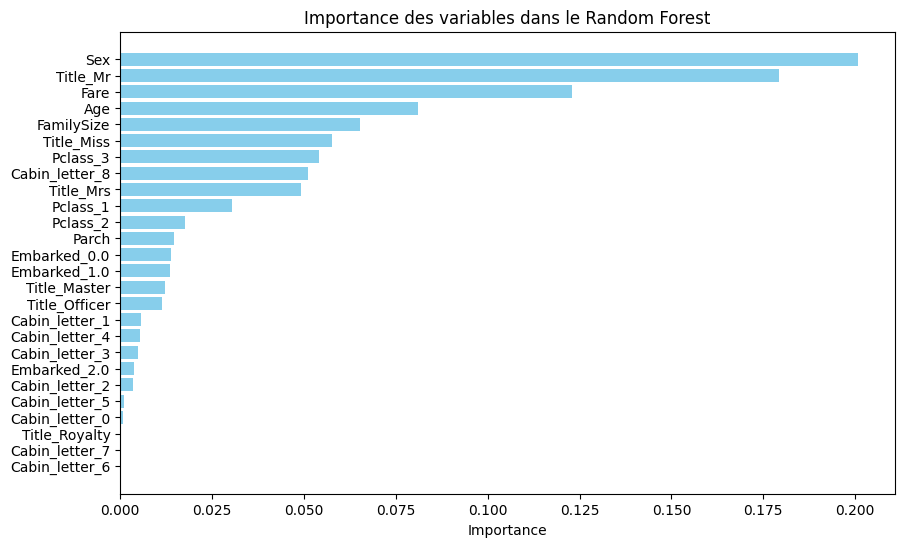

In [ ]:
# Récupérer l'importance des features
importances = best_rf.feature_importances_

# Créer un DataFrame pour faciliter la visualisation
feat_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Affichage avec matplotlib
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['feature'], feat_importances['importance'], color='skyblue')
plt.gca().invert_yaxis()  # Pour afficher la feature la plus importante en haut
plt.xlabel('Importance')
plt.title('Importance des variables dans le Random Forest')
plt.show()